In [1]:
from pydataset import data

iris = data('iris')
print(iris.head(3))
print(iris.shape)
print(iris.columns)
print(iris.dtypes)
for i in iris.columns:
    print(iris[i].describe())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
(150, 5)
Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal.Length, dtype: float64
count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal.Width, dtype: float64
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50

Yes, I would recommend scaling the data.

In [2]:
import pandas as pd

df_excel_sample = pd.read_excel('excel_exercises.xlsx', sheet_name='Table1_CustDetails', nrows=100)
print(len(df_excel_sample.index))
print(df_excel_sample.columns[:5])

100
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')


In [3]:
dtypes = df_excel_sample.dtypes
objects = dtypes[dtypes.values == 'object']
print(objects.index)
numerics = dtypes[dtypes.values != 'object']

def series_range(series):
    return series.max() - series.min()

ranges = pd.Series().reindex(numerics.index)
for i in numerics.index:
    ranges[i] = series_range(df_excel_sample[i])

print(ranges)

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')
is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges        97.40
total_charges        8476.85
dtype: float64


In [4]:
sheet = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
to_read = sheet.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(to_read)

In [5]:
print(df_google.head(3))
print(df_google.shape)
print(df_google.columns)
print(df_google.dtypes)
dtypes = df_google.dtypes
numerics = dtypes[dtypes.values != 'object']
for i in numerics.index:
    print(df_google[i].describe())
categoricals = dtypes[dtypes.values == 'object']
for i in categoricals.index:
    print(df_google[i].unique())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Pa

In [6]:
import acquire

iris = acquire.get_iris_data()
titanic = acquire.get_titanic_data()

In [7]:
iris.drop(columns=['species_id', 'measurement_id'], inplace=True)

In [8]:
iris.rename(columns={'species_name':'species'}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
encoder.fit(iris.species)
iris.species = encoder.transform(iris.species)

In [11]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [12]:
titanic.embark_town.value_counts(dropna=False)
titanic.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [13]:
titanic.embark_town.fillna('Other', inplace=True)
titanic.embarked.fillna('Other', inplace=True)
titanic.drop(columns='deck', inplace=True)

In [14]:
encoder = LabelEncoder()
encoder.fit(titanic.embarked)
titanic.embarked = encoder.transform(titanic.embarked)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
titanic[['fare', 'age']] = scaler.fit_transform(titanic[['fare', 'age']])

In [16]:
import prepare
import acquire

In [17]:
iris, iris_encoder = prepare.prep_iris(acquire.get_iris_data())

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
seed = 43
iris_train, iris_test = train_test_split(iris, train_size=.7, random_state=seed)

In [20]:
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid", palette="muted")

In [21]:
iris_melt = pd.melt(iris_train, 'species', var_name='measurement')

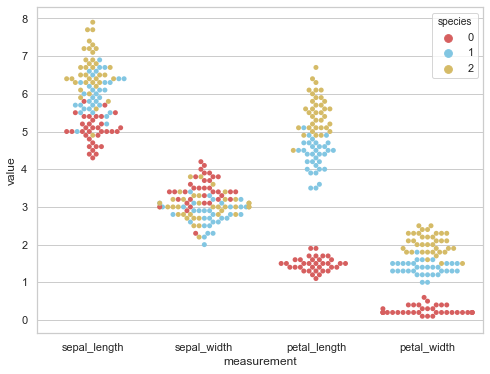

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

p = sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris_melt)

plt.show()

In [23]:
iris_train['sepal_area'] = iris_train.sepal_width * iris_train.sepal_length
iris_train['petal_area'] = iris_train.petal_length * iris_train.petal_width
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
55,5.7,2.8,4.5,1.3,1,15.96,5.85
90,5.5,2.6,4.4,1.2,1,14.30,5.28
79,5.7,2.6,3.5,1.0,1,14.82,3.50
65,6.7,3.1,4.4,1.4,1,20.77,6.16
56,6.3,3.3,4.7,1.6,1,20.79,7.52


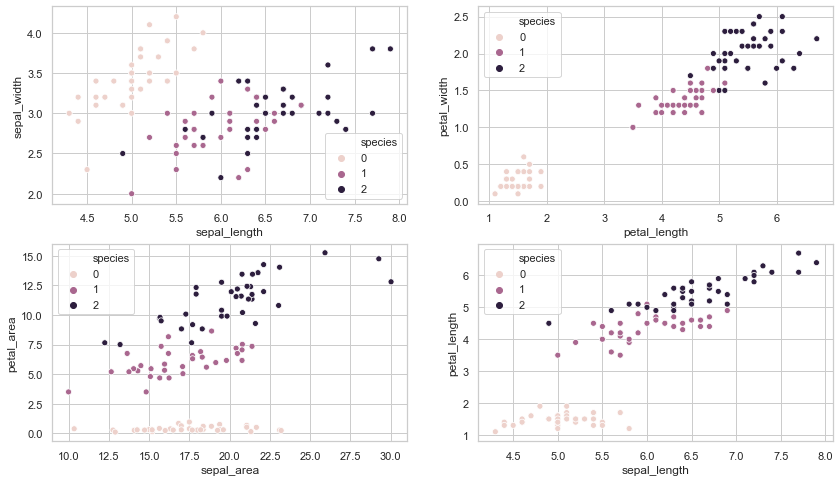

In [24]:
import numpy as np
ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))[1]

sns.scatterplot('sepal_length', 'sepal_width', hue='species', data=iris_train, ax=ax[0][0])
sns.scatterplot('petal_length', 'petal_width', hue='species', data=iris_train, ax=ax[0][1])
sns.scatterplot('sepal_area', 'petal_area', hue='species', data=iris_train, ax=ax[1][0])
sns.scatterplot('sepal_length', 'petal_length', hue='species', data=iris_train, ax=ax[1][1])

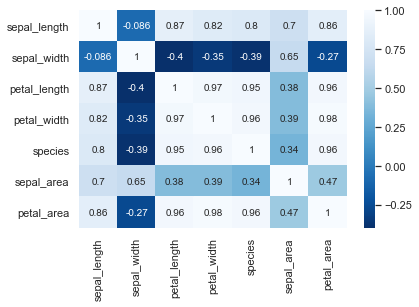

In [25]:
sns.heatmap(iris_train.corr(),annot=True,cmap='Blues_r')

H<sub>0</sub>: the difference in sepal length between virginica and versicolor is insignificant.  
H<sub>a</sub>: the difference in sepal length between virginica and versicolor is significant.

In [26]:
import scipy as sp

iris_train['species'] = iris_encoder.inverse_transform(iris_train.species)

In [27]:
sp.stats.ttest_ind(iris_train[iris_train.species == 'virginica'].sepal_length,
                  iris_train[iris_train.species =='versicolor'].sepal_length)

Ttest_indResult(statistic=4.749837285018204, pvalue=1.0917656210971116e-05)

the difference is significant. p-value is <.05